In [2]:
import os
import sys
import tensorflow as tf
import numpy as np
import amlrealtimeai
from amlrealtimeai import resnet50

import h5py

In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load MNIST
f = h5py.File("//Users/atsaris/mygit_repos/ml_service/datasets/RandomData/hdf5/mnist_test.hdf5",'r')
images = np.array(f['features'])
images = images.reshape(images.shape[0], images.shape[2], images.shape[3], images.shape[1])/255.
#print(images[0,:,:,-1].shape)
#plt.imshow(images[0,:,:,-1])
labels = np.array(f['targets'])
labels = labels.reshape(labels.shape[0])
f.close()

NUMBER_OF_DATA = 500

# Reshape the image
images = images[:NUMBER_OF_DATA]
sess = tf.Session()
with sess.as_default():
    images_tf = tf.image.grayscale_to_rgb(images)
    images_tf = tf.image.resize_images(images_tf, [224,224])
    images = images_tf.eval()

    
print(type(images))
print(images.shape)

<class 'numpy.ndarray'>
(500, 224, 224, 3)


(224, 224, 3)


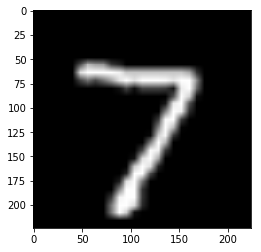

In [10]:
print(images[0].shape)
plt.imshow(images[0])

In [37]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
from keras import optimizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
#from keras import backend as K
#K.set_image_dim_ordering('th')

def model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(224, 224, 3), activation='relu', data_format="channels_last"))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [38]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

onehot_labels = np_utils.to_categorical(labels)
X_train, X_test, y_train, y_test = train_test_split(images, onehot_labels[:NUMBER_OF_DATA], random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(375, 224, 224, 3) (125, 224, 224, 3) (375, 10) (125, 10)


In [39]:
model = model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)

Train on 375 samples, validate on 125 samples
Epoch 1/5
375/375 [==============================] - 33s 88ms/step - loss: 2.2204 - acc: 0.2187 - val_loss: 1.9886 - val_acc: 0.4960
Epoch 2/5
375/375 [==============================] - 30s 80ms/step - loss: 1.7235 - acc: 0.5067 - val_loss: 1.4530 - val_acc: 0.5040
Epoch 3/5
375/375 [==============================] - 31s 84ms/step - loss: 1.1130 - acc: 0.6533 - val_loss: 1.1942 - val_acc: 0.6560
Epoch 4/5
375/375 [==============================] - 35s 94ms/step - loss: 0.7646 - acc: 0.7093 - val_loss: 1.1367 - val_acc: 0.6400
Epoch 5/5
375/375 [==============================] - 35s 93ms/step - loss: 0.5351 - acc: 0.8213 - val_loss: 0.8819 - val_acc: 0.7680


In [40]:
from numpy import argmax

y_probs = model.predict(X_test)
y_prob_max = np.argmax(y_probs, 1)
y_test_max = np.argmax(y_test, 1)
print(y_probs)
print(y_prob_max)
print(y_test_max)

[[1.84285687e-04 1.93697579e-05 1.67914887e-03 ... 8.95154426e-06
  8.64044356e-04 1.04795545e-02]
 [3.28130773e-05 4.33853222e-03 1.75034385e-02 ... 7.36412585e-01
  1.76161662e-01 5.85521795e-02]
 [2.33959570e-03 1.77372049e-03 3.06513235e-02 ... 1.33503219e-02
  7.83793569e-01 1.18962325e-01]
 ...
 [9.38513331e-05 8.09970140e-01 3.64392530e-04 ... 9.30960253e-02
  8.08524992e-03 8.45740959e-02]
 [2.72268504e-02 2.92513396e-05 2.32678070e-03 ... 2.16153916e-03
  7.37635717e-02 2.02976679e-03]
 [1.67591276e-03 8.60349333e-04 7.15830503e-03 ... 4.72953031e-03
  3.16831358e-02 9.94645339e-03]]
[6 7 8 5 9 9 1 4 3 3 4 0 0 5 2 8 8 3 6 2 6 5 2 5 3 6 9 5 0 3 4 9 0 3 1 5 1
 7 9 3 6 3 0 9 6 7 7 6 9 6 2 5 6 7 9 0 0 3 1 9 7 7 3 5 7 1 3 8 4 8 0 9 8 9
 5 9 5 0 1 8 1 2 2 2 7 3 1 9 0 2 7 6 7 0 5 5 7 7 7 5 2 4 4 9 1 4 7 7 2 5 1
 2 8 0 7 9 2 2 4 9 9 1 1 5 3]
[6 9 8 5 9 9 1 7 3 3 9 0 5 8 2 1 8 3 6 3 0 5 2 5 3 6 4 5 0 3 4 9 0 3 1 5 1
 7 9 3 6 3 0 9 4 2 7 6 7 6 2 5 6 7 9 0 0 3 1 9 7 7 3 5 7 1 3 1 4 8 5 6

Accuracy 0.768
Precision [0.83333333 0.91666667 0.84615385 1.         0.625      0.8
 0.8        0.64705882 0.625      0.58823529]
Recall [0.90909091 0.84615385 0.78571429 0.76470588 0.5        0.8
 0.88888889 0.78571429 0.55555556 0.76923077]
F1 [0.86956522 0.88       0.81481481 0.86666667 0.55555556 0.8
 0.84210526 0.70967742 0.58823529 0.66666667]
Confusion Matrix [[10, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 11, 0, 0, 0, 0, 0, 0, 2, 0], [0, 0, 11, 0, 0, 0, 0, 3, 0, 0], [0, 0, 1, 13, 0, 0, 0, 2, 1, 0], [0, 0, 1, 0, 5, 0, 1, 0, 0, 3], [2, 0, 0, 0, 1, 12, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 11, 0, 2], [0, 0, 0, 0, 0, 3, 0, 0, 5, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 10]]


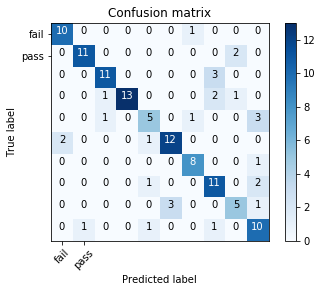

In [41]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import itertools
import matplotlib
from matplotlib import pyplot as plt

# compute a bunch of classification metrics 
def classification_metrics(y_true, y_pred, y_prob):
    cm_dict = {}
    cm_dict['Accuracy'] = accuracy_score(y_true, y_pred)
    cm_dict['Precision'] =  precision_score(y_true, y_pred, average=None)
    cm_dict['Recall'] =  recall_score(y_true, y_pred, average=None)
    cm_dict['F1'] =  f1_score(y_true, y_pred, average=None) 
    #cm_dict['AUC'] = roc_auc_score(y_true, y_prob[:,0])
    cm_dict['Confusion Matrix'] = confusion_matrix(y_true, y_pred).tolist()
    return cm_dict

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """Plots a confusion matrix.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    New BSD License - see appendix
    """
    cm_max = cm.max()
    cm_min = cm.min()
    if cm_min > 0: cm_min = 0
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_max = 1
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm_max / 2.
    plt.clim(cm_min, cm_max)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,
                 round(cm[i, j], 3),  # round to 3 decimals if they are float
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
cm_dict = classification_metrics(y_test_max, y_prob_max, y_probs)
for m in cm_dict:
    print(m, cm_dict[m])
cm = np.asarray(cm_dict['Confusion Matrix'])
plot_confusion_matrix(cm, ['fail','pass'], normalize=False)